In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline  
from q1_softmax import *
from q2_gradcheck import *
from q2_sigmoid import *
from q2_neural import *
from q3_word2vec import *
from q3_sgd import *
from q3_run import *
from q4_softmaxreg import *
from q4_sentiment import *
#main_q2()
#main_q1()
main_q2_sigmod()

Running basic tests...
[[ 0.73105858  0.88079708]
 [ 0.26894142  0.11920292]]
[[ 0.19661193  0.10499359]
 [ 0.19661193  0.10499359]]
You should verify these results!

Running your tests...


In [2]:
def cross_entropy(theta, y):
    y_hat=softmax(theta-np.max(theta))
    assert y_hat.shape == y.shape
    temp=np.log(y_hat)
    loss=-np.sum(y*temp)
    grads=-y+np.sum(y)*y_hat
    return loss, grads

y=np.array([1.0, 2.0, 4.0, 3.0])
theta=np.array([0.1, 0.2, 0.4, 0.5])

#In Python: a-=3 with a=a-3 (has differnt meaning argument.) 
#Python all passed by references. (only changed value with -=, *=, /=, +=)
# http://stackoverflow.com/questions/11585793/are-numpy-arrays-passed-by-reference


#a1=softmax(theta)
#print a1
#print theta
#a2=softmax(theta-np.max(theta))
#assert np.sum(abs(a1-a2)) < 1e-5
#raise Exception('Stop here!!!!')

#y=np.random.randn(20)
#y=np.zeros(20)
#y[0]=1.0
#theta=np.random.randn(20)

f=lambda x: cross_entropy(x, y) #using y initialized above
#print f(theta)
#print f(theta)
my_gradcheck_naive(f, theta)
gradcheck_naive(f, theta)
#print theta

Your gradient: 1.021487 	 Numerical gradient: 1.021487 	 diffence:7.67590978023e-12
Your gradient: 0.234088 	 Numerical gradient: 0.234088 	 diffence:7.51642914576e-11
Your gradient: -1.271278 	 Numerical gradient: -1.271278 	 diffence:4.15546401137e-11
Your gradient: 0.015704 	 Numerical gradient: 0.015704 	 diffence:3.05750758045e-09
Gradient check passed!
Gradient check passed!


In [3]:
from q2_neural import *
main_q2_neural()

Running sanity check...
Gradient check passed!
Running your sanity checks...
Gradient check passed!


In [4]:
from q3_word2vec import *
test_normalize_rows()

Testing normalizeRows...
[[ 0.6         0.8       ]
 [ 0.4472136   0.89442719]
 [ 0.6         0.8       ]
 [ 0.61394061  0.78935222]]



In [5]:

W=100 #100 words
D=20 # each word is expressed as a 20-dimensional vector
U=np.random.randn(D, W) #each column vector corresponds to a latent 20-dimensional vector
v_c=np.random.randn(D)
y=np.random.randn(W)
#print y.shape, '........'
#print y.shape

loss, grads=crossEntropyWord2VecVc(U, v_c, y)
f=lambda v_c: crossEntropyWord2VecVc(U, v_c, y)
#my_gradcheck_naive(f, v_c)
gradcheck_naive(f, v_c)

Gradient check passed!


In [6]:
W=100 #100 words
D=20 # each word is expressed as a 20-dimensional vector
U=np.random.randn(D, W) #each column vector corresponds to a latent 20-dimensional vector
v_c=np.random.randn(D)
y=np.random.randn(W)
#print y.shape, '........'
#print y.shape

loss, grads=crossEntropyWord2VecU(U, v_c, y)
f=lambda U: crossEntropyWord2VecU(U, v_c, y)
#my_gradcheck_naive(f, U)
gradcheck_naive(f, U)

Gradient check passed!


In [7]:
W=100 #100 words
D=20 # each word is expressed as a 20-dimensional vector
U=np.random.randn(D, W) #each column vector corresponds to a latent 20-dimensional vector
v_c=np.random.randn(D)
y=np.random.randn(W)


loss, grads=crossEntropyWord2Vec(U, v_c, y)

for key in grads:
    x=grads[key]
    print 'Checking gradient of key: %s' % key
    if key=='U':
        continue
        f=lambda U: crossEntropyWord2Vec(U, v_c, y)[0]
        grad_check_full(f, U, grads[key])
    if key=='vc':
        f=lambda vc: crossEntropyWord2Vec(U, vc, y)[0]
        grad_check_full(f, v_c, grads[key])
#f=lambda x: crossEntropyWord2Vec(U, v_c, y)
#my_gradcheck_naive(f, U)
#gradcheck_naive(f, U)
#grad_check_sparse()

Checking gradient of key: vc
Position: (0,) numerical: -10.692157 analytic: -10.692157, relative error: 0.000000
Position: (1,) numerical: -5.492647 analytic: -5.492647, relative error: 0.000000
Position: (2,) numerical: -10.142179 analytic: -10.142179, relative error: 0.000000
Position: (3,) numerical: 20.881189 analytic: 20.881189, relative error: 0.000000
Position: (4,) numerical: 2.133557 analytic: 2.133557, relative error: 0.000000
Position: (5,) numerical: -8.780028 analytic: -8.780028, relative error: 0.000000
Position: (6,) numerical: -5.196227 analytic: -5.196227, relative error: 0.000000
Position: (7,) numerical: 1.572490 analytic: 1.572490, relative error: 0.000000
Position: (8,) numerical: 0.936488 analytic: 0.936488, relative error: 0.000000
Position: (9,) numerical: -7.883129 analytic: -7.883129, relative error: 0.000000
Position: (10,) numerical: -5.755915 analytic: -5.755915, relative error: 0.000000
Position: (11,) numerical: 21.393743 analytic: 21.393743, relative err

In [8]:
W=100 #100 words
D=20 # each word is expressed as a 20-dimensional vector
U=np.random.randn(D, W) #each column vector corresponds to a latent 20-dimensional vector
cols=np.array([0, 2, 6])
vc=np.random.randn(D)
index_uo=10
K=10
uo=U[:, index_uo]
rndstate = random.getstate()
random.setstate(rndstate)  
loss,_=singleWordCostandGradientNegativeSampling(U,vc, uo, K, index_uo)
random.setstate(rndstate)  


U=np.zeros((D,W))
cols=np.array([0, 2, 6])
vc=np.random.randn(D)
index_uo=10
uo=U[:, index_uo]
random.setstate(rndstate)  
loss,_=singleWordCostandGradientNegativeSampling(U,vc, uo, K, index_uo)
random.setstate(rndstate)  
t= -np.log(0.5)-len(cols)*np.log(0.5)
assert abs(loss-t) <= 1e-5, 'Wrong loss %s %s' % (loss, t)
#print vc.shape

U=np.ones((D,W))
vc=np.ones(D)
index_uo=10
uo=U[:, index_uo]
random.setstate(rndstate)  
loss,_=singleWordCostandGradientNegativeSampling(U,vc, uo, K, index_uo)
random.setstate(rndstate)  
t= -np.log(sigmoid(20))-len(cols)*np.log(sigmoid(-20))
assert abs(loss-t) <= 1e-5, 'Wrong loss %s %s' % (loss, t)

print 'Loss check passed!'


TypeError: singleWordCostandGradientNegativeSampling() takes exactly 4 arguments (5 given)

In [9]:
W=5 #100 words
D=20 # each word is expressed as a 20-dimensional vector
U=np.random.randn(D, W) #each column vector corresponds to a latent 20-dimensional vector
cols=np.array([0, 2, 6])
vc=np.random.randn(D)
index_uo=2
uo=U[:, index_uo]
K=20
rndstate = random.getstate()
random.setstate(rndstate)  
loss,grads=singleWordCostandGradientNegativeSampling(U,vc, uo, K, index_uo)
random.setstate(rndstate) 

for key in grads:
    x=grads[key]
    print 'Checking gradient of key: %s' % key
    if key=='U':
        #continue
        f=lambda U: singleWordCostandGradientNegativeSampling(U,vc, uo, K, index_uo)[0]
        grad_check_full(f, U, grads[key])
    if key=='vc':
        #continue
        f=lambda vc: singleWordCostandGradientNegativeSampling(U,vc, uo, K, index_uo)[0]
        grad_check_full(f, vc, grads[key])

TypeError: singleWordCostandGradientNegativeSampling() takes exactly 4 arguments (5 given)

In [2]:
test_word2vec()

==== Gradient check for skip-gram ====
Gradient check passed!
Running time of softmaxCostAndGradient: 0.764999866486
Gradient check passed!
Running time of negSamplingCostAndGradient: 1.63100004196
Gradient check passed!
Running time of negSamplingCostAndGradient_old My implementation: 1.59700012207
Gradient check passed!
Running time of negSamplingCostAndGradient_old_2 My implementation: 2.02799987793

==== Gradient check for CBOW      ====
Running time of cbow of two method: 0.0


In [11]:
rndstate = random.getstate()
for i in range(10):
    a=random.randint(0, 4)
    #print a
print 'Done'
random.setstate(rndstate)  
for i in range(10):
    a=random.randint(0, 4)
    #print a

Done


In [12]:
a=np.zeros((5,5))
x=np.ones((5, 3))
print a
#a[:, 2:4]=x
 
a[:, [2,3,3]]=x
#print a[:, [2,3,3]]
#print a
x = np.array([8,1,1,2,2,2,5,25,1,1])
unique, counts = np.unique(x, return_counts=True)
print unique, unique.shape
print counts, counts.shape

[[ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]
 [ 0.  0.  0.  0.  0.]]
[ 1  2  5  8 25] (5L,)
[4 3 1 1 1] (5L,)


Running sanity checks...
iter 100: 0.004578
iter 200: 0.004353
iter 300: 0.004136
iter 400: 0.003929
iter 500: 0.003733
iter 600: 0.003546
iter 700: 0.003369
iter 800: 0.003200
iter 900: 0.003040
iter 1000: 0.002888


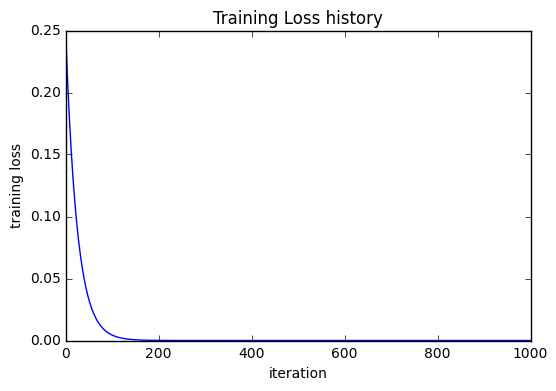

test 1 result: 8.41483678608e-10
iter 100: 0.000000
iter 200: 0.000000
iter 300: 0.000000
iter 400: 0.000000
iter 500: 0.000000
iter 600: 0.000000
iter 700: 0.000000
iter 800: 0.000000
iter 900: 0.000000
iter 1000: 0.000000


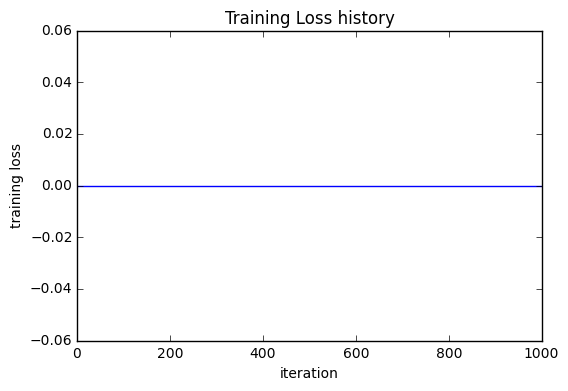

test 2 result: 0.0
iter 100: 0.041205
iter 200: 0.039181
iter 300: 0.037222
iter 400: 0.035361
iter 500: 0.033593
iter 600: 0.031913
iter 700: 0.030318
iter 800: 0.028802
iter 900: 0.027362
iter 1000: 0.025994


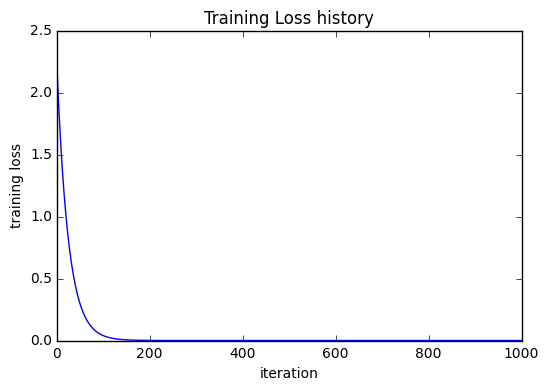

test 3 result: -2.52445103582e-09

Running your sanity checks...
Running sanity checks...
iter 100: 5.493944
iter 200: 5.224078
iter 300: 4.962959
iter 400: 4.714813
iter 500: 4.479072
iter 600: 4.255119
iter 700: 4.042363
iter 800: 3.840245
iter 900: 3.648232
iter 1000: 3.465821


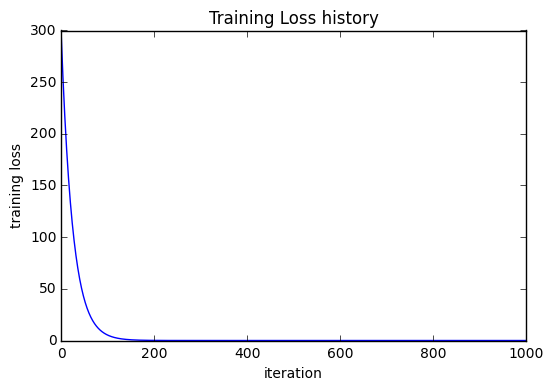

test 1 result: [  1.68296736e-08   1.68296736e-08   1.68296736e-08]


In [16]:
q3_sgd_check()

19539


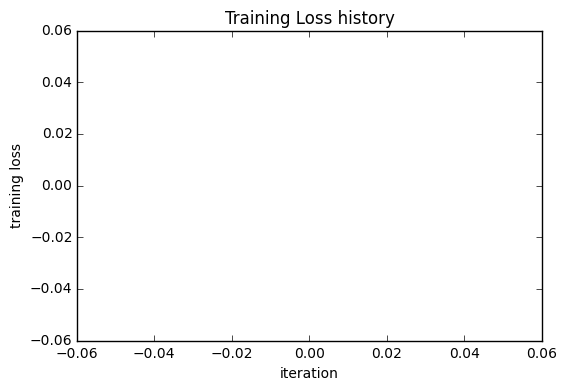

sanity check: cost at convergence should be around or below 10


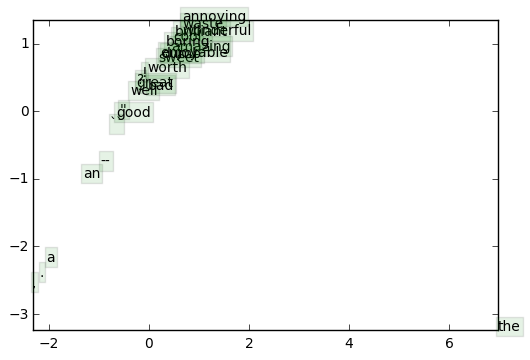

In [17]:
run_q3_showtime()

In [ ]:
import time
W=np.random.randn(10000, 50000)
x=np.random.randn(50000)

tic=time.time()
res=W.dot(x[np.newaxis,:].T)
toc=time.time()
print 'Running time is: %s' % (toc-tic)

tic=time.time()
res2=np.sum(W*x, axis=1)
toc=time.time()
print 'Running time is: %s' % (toc-tic)


assert np.sum(res2-res)<1e-5


In [ ]:
import time
W=np.random.randn(10000, 50000)
x=np.random.randn(50000)

tic=time.time()
res=W.T
toc=time.time()
print 'Running time is: %s' % (toc-tic)

tic=time.time()
res2=W
toc=time.time()
print 'Running time is: %s' % (toc-tic)

In [ ]:
def id(x):
    # This function returns the memory
    # block address of an array.
    return x.__array_interface__['data'][0]
W=np.random.randn(100, 50)
aidW=id(W)
x=np.random.randn(100)
print aidW


#%timeit a=W.T
a=W.T
print id(a)==aidW


#%timeit b=W.reshape(50,100)
b=W.reshape(250,20)
print id(b) == aidW


print a.shape
print b.shape
print W.shape


In [ ]:
import timeit
%timeit a = np.zeros(10000000)
a *= 2

%timeit a = np.zeros(10000000)
b = a * 2

import random
W=np.random.randn(1000,5000)
inds=[random.randint(0, 1000-1) for i in xrange(100)]
Wnew=W[inds,:]
print id(Wnew) == id(W)


In [ ]:
q4_softmaxreg_check()

In [ ]:
run_sentiment()